# Content
#### 1)Data Cleaning
###### 1.1) Changing Columns names
###### 1.1) Checking missing Values and nan values
#### 2)  Data visualization
#### 3) Feature Engineering 
###### 3.1) Label Encoding
#### 4) Feature Selection
#### 5) Algorithm

# Loading Libraries

In [250]:
import pandas as pd
import numpy as np
import datetime as dt
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline 

#  Loading the data

In [251]:
data = pd.read_csv('data.csv')

In [252]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  4617 non-null   int64  
 1   columns1    4617 non-null   object 
 2   columns2    4617 non-null   int64  
 3   columns3    4617 non-null   int64  
 4   columns4    4617 non-null   object 
 5   columns5    4617 non-null   object 
 6   columns6    4617 non-null   object 
 7   columns7    4617 non-null   int64  
 8   columns8    4617 non-null   float64
 9   columns9    4617 non-null   int64  
 10  columns10   4617 non-null   float64
 11  columns11   4617 non-null   float64
 12  columns12   4617 non-null   int64  
 13  columns13   4617 non-null   float64
 14  columns14   4617 non-null   float64
 15  columns15   4617 non-null   int64  
 16  columns16   4617 non-null   float64
 17  columns17   4617 non-null   float64
 18  columns18   4617 non-null   int64  
 19  columns19   4617 non-null  

In [253]:
data.head()

,Unnamed: 0,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,...,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,0,KS,128,415,382-4657,no,yes,25,265.1,110,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,1,OH,107,415,371-7191,no,yes,26,161.6,123,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,2,NJ,137,415,358-1921,no,no,0,243.4,114,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,3,OH,84,408,375-9999,yes,no,0,299.4,71,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,4,OK,75,415,330-6626,yes,no,0,166.7,113,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


# 1) Data Cleaning

## 1.1  Changing Columns names

In [254]:
# changing cols with rename() 
new_data = data.rename(columns = {"columns1": "State", 
                                  "columns2":"Account Length", 
                                  "columns3": "Area Code"}) 
  
# changing columns using .columns() 
data.columns = ['u',
    'State','Account_Length','Area_Code','Phone','International_Plan','VMail_Plan','VMail_Message','Day_Mins','Day_Calls',
                'Day_Charge','Eve_Mins','Eve_Calls','Eve_Charge','Night_Mins','Night_Calls','Night_Charge','International_Mins',
                'International_calls','International_Charge','CustServ_Calls','Churn']  

In [255]:
data.head()

,u,State,Account_Length,Area_Code,Phone,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,...,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,Churn
0,0,KS,128,415,382-4657,no,yes,25,265.1,110,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,1,OH,107,415,371-7191,no,yes,26,161.6,123,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,2,NJ,137,415,358-1921,no,no,0,243.4,114,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,3,OH,84,408,375-9999,yes,no,0,299.4,71,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,4,OK,75,415,330-6626,yes,no,0,166.7,113,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


## 1.2  Checking missing Values and nan values

In [256]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   u                     4617 non-null   int64  
 1   State                 4617 non-null   object 
 2   Account_Length        4617 non-null   int64  
 3   Area_Code             4617 non-null   int64  
 4   Phone                 4617 non-null   object 
 5   International_Plan    4617 non-null   object 
 6   VMail_Plan            4617 non-null   object 
 7   VMail_Message         4617 non-null   int64  
 8   Day_Mins              4617 non-null   float64
 9   Day_Calls             4617 non-null   int64  
 10  Day_Charge            4617 non-null   float64
 11  Eve_Mins              4617 non-null   float64
 12  Eve_Calls             4617 non-null   int64  
 13  Eve_Charge            4617 non-null   float64
 14  Night_Mins            4617 non-null   float64
 15  Night_Calls          

In [257]:
data.describe()

,u,Account_Length,Area_Code,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000
mean,2308.000000,100.645224,437.046350,7.849903,180.447152,100.054364,30.676576,200.429088,100.179770,17.036703,200.623933,99.944120,9.028185,10.279294,4.433831,2.775926,1.567035
std,1332.957426,39.597194,42.288212,13.592333,53.983540,19.883027,9.177145,50.557001,19.821314,4.297332,50.543616,19.935053,2.274488,2.757361,2.457615,0.744413,1.307019
min,0.000000,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,12.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,1154.000000,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,165.900000,87.000000,14.100000,167.100000,87.000000,7.520000,8.600000,3.000000,2.320000,1.000000
50%,2308.000000,100.000000,415.000000,0.000000,180.000000,100.000000,30.600000,200.800000,101.000000,17.070000,200.800000,100.000000,9.040000,10.300000,4.000000,2.780000,1.000000
75%,3462.000000,127.000000,510.000000,17.000000,216.800000,113.000000,36.860000,234.000000,114.000000,19.890000,234.900000,113.000000,10.570000,12.100000,6.000000,3.270000,2.000000
max,4616.000000,243.000000,510.000000,51.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


# 2) Data visualization

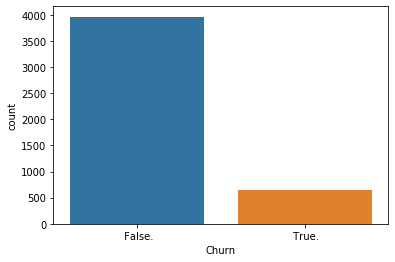

In [258]:
sns.countplot(data=data,x='Churn')

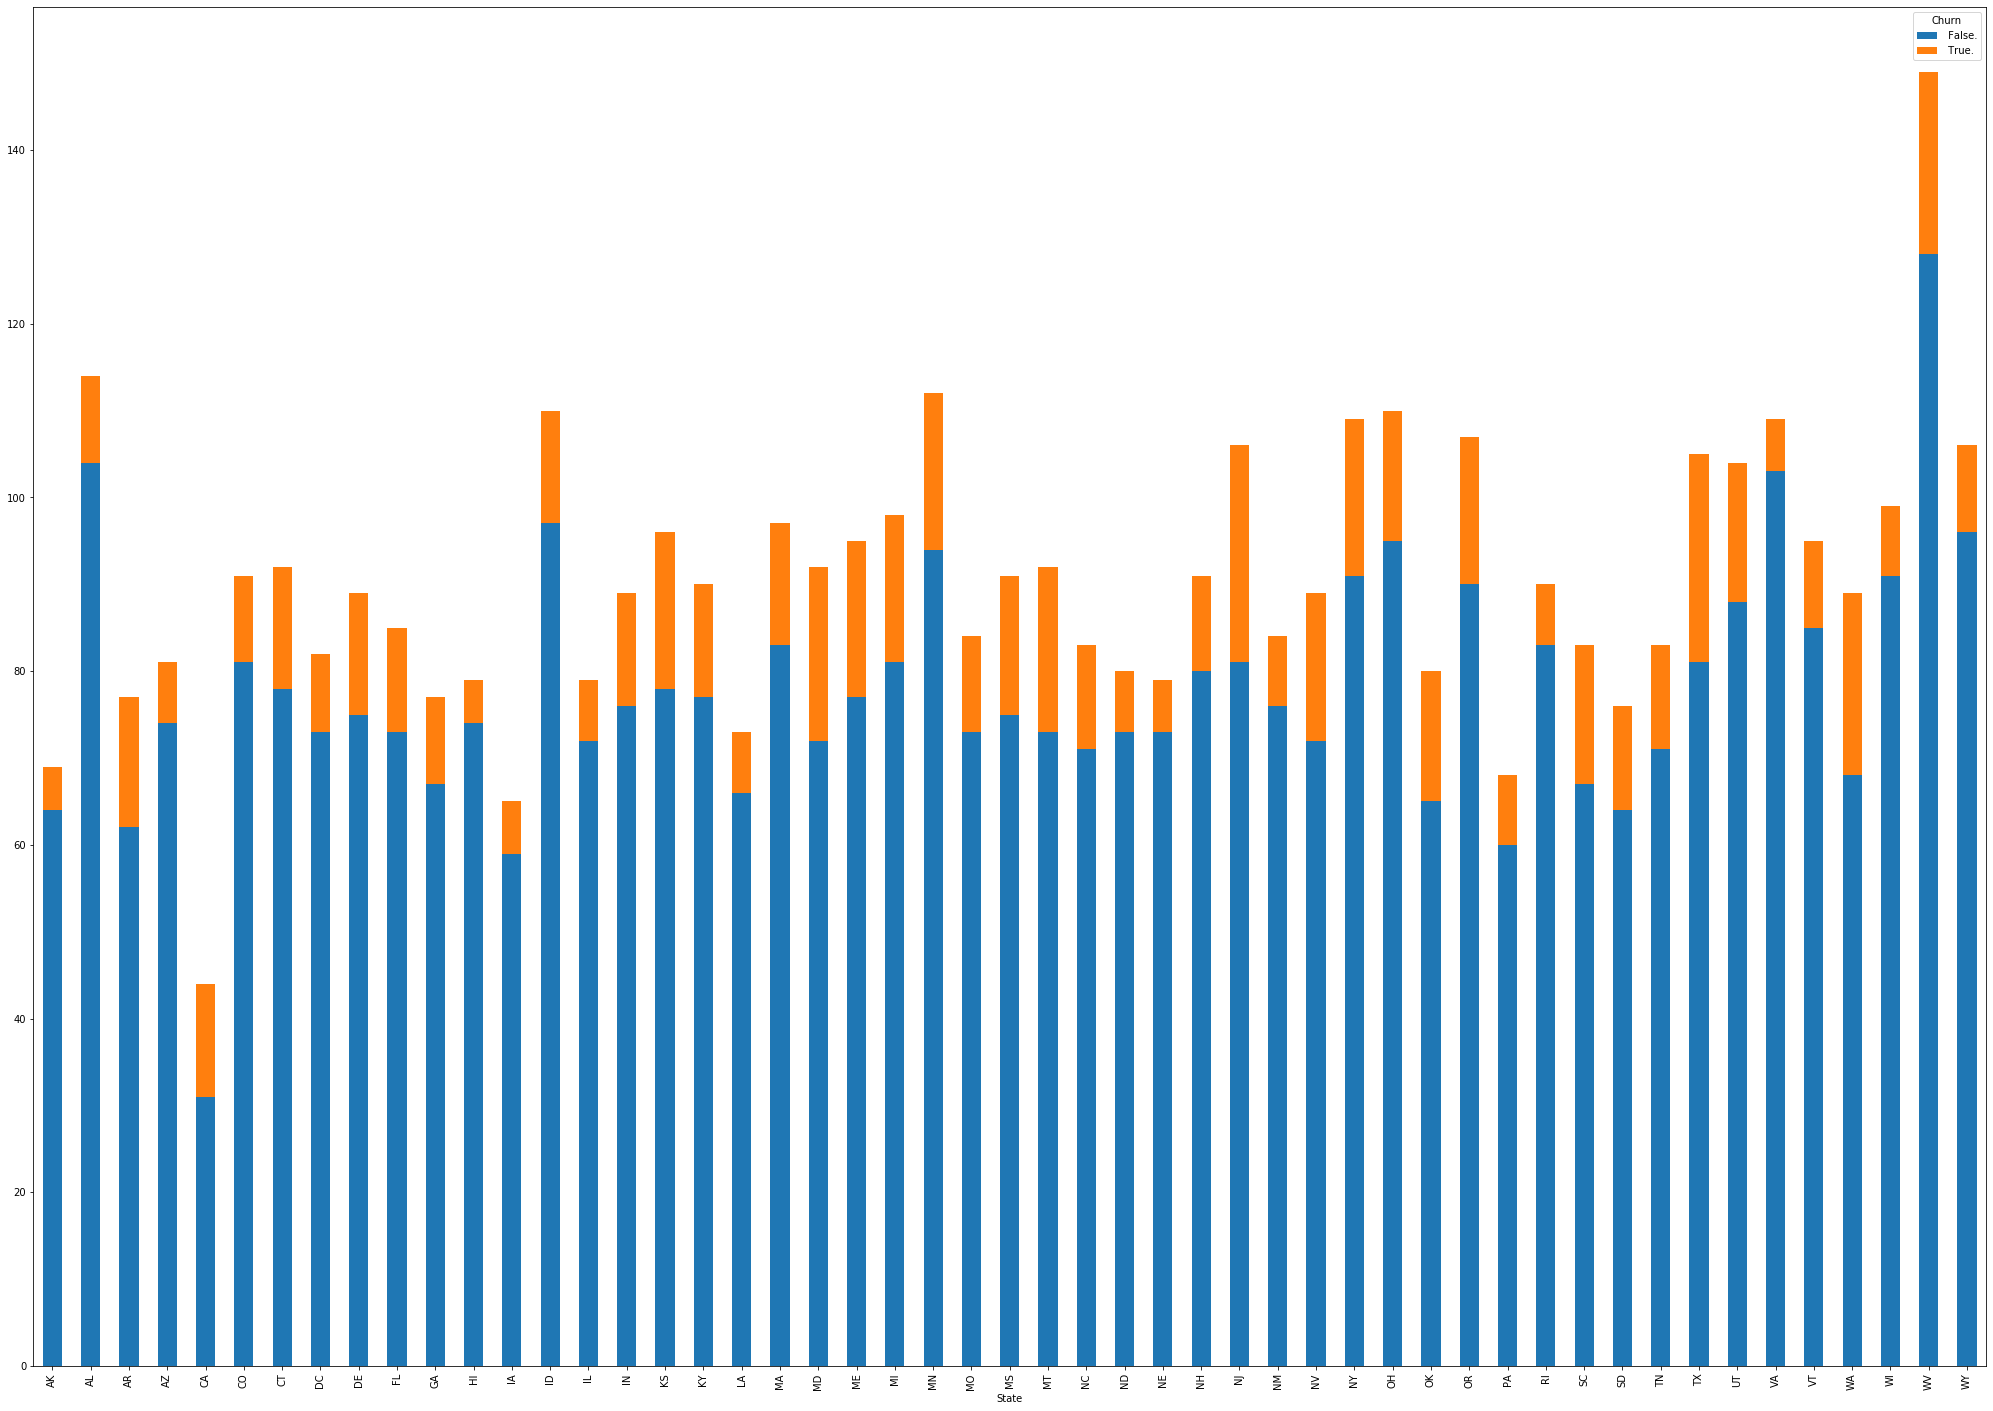

In [259]:
data.groupby(['State','Churn']).size().unstack().plot(kind='bar',stacked=True,figsize=(35,25))

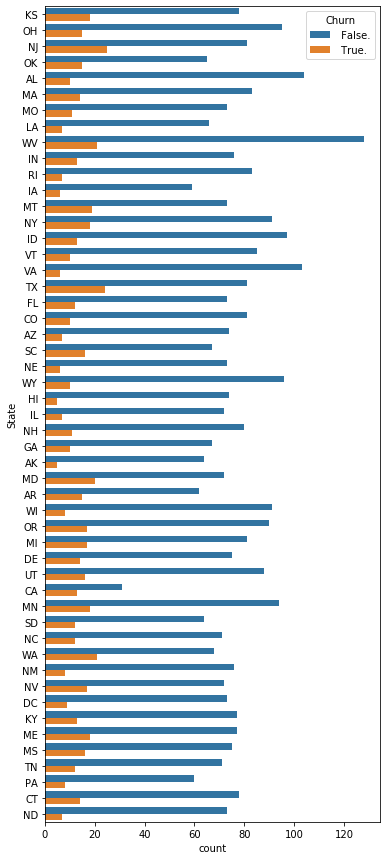

In [260]:
f, ax = plt.subplots(figsize=(6, 15))

sns.countplot(data=data,y='State',hue='Churn')

- NJ,TX state is highest Churn state

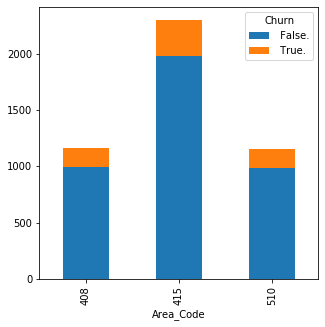

In [261]:
data.groupby(["Area_Code", "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5)) 

- Area_Code=415 is highest Churn Area

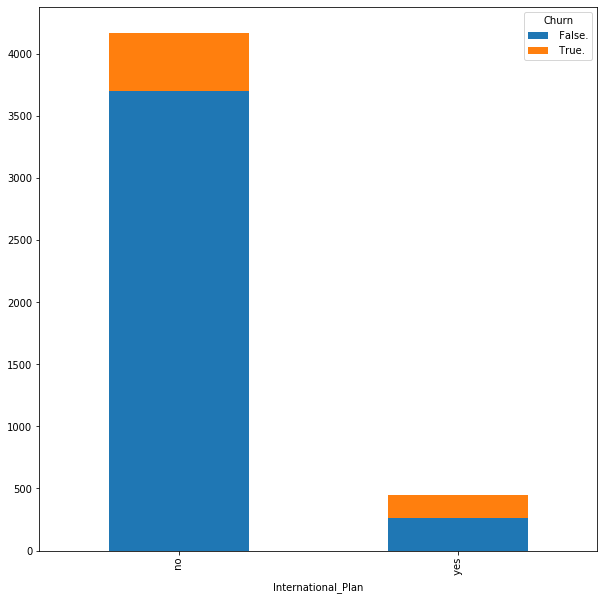

In [262]:
data.groupby(['International_Plan','Churn']).size().unstack().plot(kind='bar',stacked=True,figsize=(10,10))

- Churn rate is higher who are using international plan and other are they are not using international plan

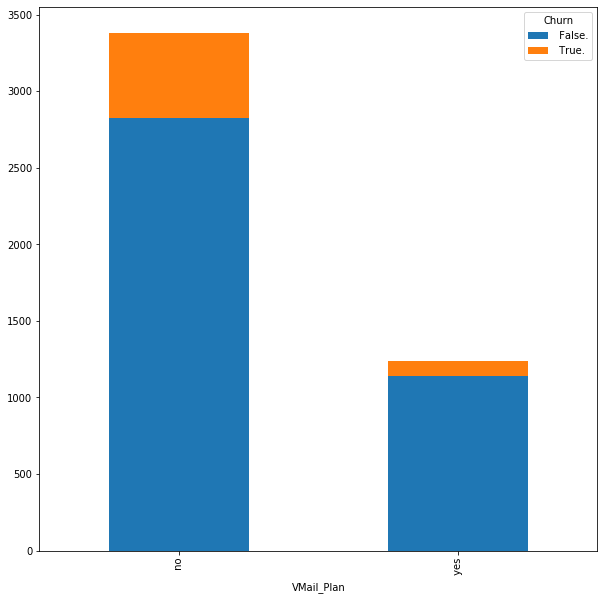

In [263]:
data.groupby(['VMail_Plan','Churn']).size().unstack().plot(kind='bar',stacked=True,figsize=(10,10))

- Churn rate is low when using VMail_Plan

# 3)Feature Engineering




## 3.1) Label Encoding

In [264]:
data.drop(['u','Phone','Account_Length'],axis=1,inplace=True)


In [265]:
data

,State,Area_Code,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,Churn
0,KS,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,510,no,yes,25,144.0,81,24.48,187.2,112,15.91,158.6,122,7.14,8.5,6,2.30,3,False.
4613,NM,408,no,yes,29,189.0,91,32.13,303.1,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,408,no,yes,33,127.5,126,21.68,296.1,129,25.17,200.9,91,9.04,13.0,3,3.51,1,False.
4615,MI,415,no,yes,23,168.9,98,28.71,226.3,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.


In [266]:
# Taking care of categorical data
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
categorical_cols =['Churn','International_Plan','VMail_Plan','State']
data[categorical_cols] = data[categorical_cols].apply(lambda col: labelencoder.fit_transform(col.astype(str)))
data.head(10).transpose()

,0,1,2,3,4,5,6,7,8,9
State,16.00,35.00,31.00,35.00,36.00,1.00,19.00,24.00,18.00,49.00
Area_Code,415.00,415.00,415.00,408.00,415.00,510.00,510.00,415.00,408.00,415.00
International_Plan,0.00,0.00,0.00,1.00,1.00,1.00,0.00,1.00,0.00,1.00
VMail_Plan,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00
VMail_Message,25.00,26.00,0.00,0.00,0.00,0.00,24.00,0.00,0.00,37.00
Day_Mins,265.10,161.60,243.40,299.40,166.70,223.40,218.20,157.00,184.50,258.60
Day_Calls,110.00,123.00,114.00,71.00,113.00,98.00,88.00,79.00,97.00,84.00
Day_Charge,45.07,27.47,41.38,50.90,28.34,37.98,37.09,26.69,31.37,43.96
Eve_Mins,197.40,195.50,121.20,61.90,148.30,220.60,348.50,103.10,351.60,222.00
Eve_Calls,99.00,103.00,110.00,88.00,122.00,101.00,108.00,94.00,80.00,111.00


In [267]:
data.head()

,State,Area_Code,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,Churn
0,16,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [268]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 4617 non-null   int32  
 1   Area_Code             4617 non-null   int64  
 2   International_Plan    4617 non-null   int32  
 3   VMail_Plan            4617 non-null   int32  
 4   VMail_Message         4617 non-null   int64  
 5   Day_Mins              4617 non-null   float64
 6   Day_Calls             4617 non-null   int64  
 7   Day_Charge            4617 non-null   float64
 8   Eve_Mins              4617 non-null   float64
 9   Eve_Calls             4617 non-null   int64  
 10  Eve_Charge            4617 non-null   float64
 11  Night_Mins            4617 non-null   float64
 12  Night_Calls           4617 non-null   int64  
 13  Night_Charge          4617 non-null   float64
 14  International_Mins    4617 non-null   float64
 15  International_calls  

In [269]:
data.Area_Code.value_counts()

415    2299
408    1161
510    1157
Name: Area_Code, dtype: int64

In [270]:
data=pd.get_dummies(data,prefix='Code',columns=['Area_Code'],drop_first=True)
data

,State,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,Churn,Code_415,Code_510
0,16,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1,0
1,35,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1,0
2,31,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,1,0
3,35,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0,0
4,36,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,34,0,1,25,144.0,81,24.48,187.2,112,15.91,158.6,122,7.14,8.5,6,2.30,3,0,0,1
4613,32,0,1,29,189.0,91,32.13,303.1,96,25.76,163.6,116,7.36,15.7,1,4.24,3,0,0,0
4614,46,0,1,33,127.5,126,21.68,296.1,129,25.17,200.9,91,9.04,13.0,3,3.51,1,0,0,0
4615,22,0,1,23,168.9,98,28.71,226.3,117,19.24,165.5,96,7.45,14.3,3,3.86,0,0,1,0


In [271]:
data.columns

Index(['State', 'International_Plan', 'VMail_Plan', 'VMail_Message',
       'Day_Mins', 'Day_Calls', 'Day_Charge', 'Eve_Mins', 'Eve_Calls',
       'Eve_Charge', 'Night_Mins', 'Night_Calls', 'Night_Charge',
       'International_Mins', 'International_calls', 'International_Charge',
       'CustServ_Calls', 'Churn', 'Code_415', 'Code_510'],
      dtype='object')

In [272]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   State                 4617 non-null   int32  
 1   International_Plan    4617 non-null   int32  
 2   VMail_Plan            4617 non-null   int32  
 3   VMail_Message         4617 non-null   int64  
 4   Day_Mins              4617 non-null   float64
 5   Day_Calls             4617 non-null   int64  
 6   Day_Charge            4617 non-null   float64
 7   Eve_Mins              4617 non-null   float64
 8   Eve_Calls             4617 non-null   int64  
 9   Eve_Charge            4617 non-null   float64
 10  Night_Mins            4617 non-null   float64
 11  Night_Calls           4617 non-null   int64  
 12  Night_Charge          4617 non-null   float64
 13  International_Mins    4617 non-null   float64
 14  International_calls   4617 non-null   int64  
 15  International_Charge 

In [273]:
data.State.unique()

array([16, 35, 31, 36,  1, 19, 24, 18, 49, 15, 39, 12, 26, 34, 13, 46, 45,
       43,  9,  5,  3, 40, 29, 50, 11, 14, 30, 10,  0, 20,  2, 48, 37, 22,
        8, 44,  4, 23, 41, 27, 47, 32, 33,  7, 17, 21, 25, 42, 38,  6, 28])

In [274]:
data[(data['State']>120)]

,State,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,Churn,Code_415,Code_510


# 4)Feature selection

In [275]:
data.columns

Index(['State', 'International_Plan', 'VMail_Plan', 'VMail_Message',
       'Day_Mins', 'Day_Calls', 'Day_Charge', 'Eve_Mins', 'Eve_Calls',
       'Eve_Charge', 'Night_Mins', 'Night_Calls', 'Night_Charge',
       'International_Mins', 'International_calls', 'International_Charge',
       'CustServ_Calls', 'Churn', 'Code_415', 'Code_510'],
      dtype='object')

In [276]:
data = data[['State','International_Plan','VMail_Plan','VMail_Message','Day_Mins','Day_Calls',
                'Day_Charge','Eve_Mins','Eve_Calls','Eve_Charge','Night_Mins','Night_Calls','Night_Charge','International_Mins',
                'International_calls','International_Charge','CustServ_Calls','Code_415','Code_510','Churn']]
data.head()

,State,International_Plan,VMail_Plan,VMail_Message,Day_Mins,Day_Calls,Day_Charge,Eve_Mins,Eve_Calls,Eve_Charge,Night_Mins,Night_Calls,Night_Charge,International_Mins,International_calls,International_Charge,CustServ_Calls,Code_415,Code_510,Churn
0,16,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,1,0,0
1,35,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,1,0,0
2,31,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,1,0,0
3,35,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0,0
4,36,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1,0,0


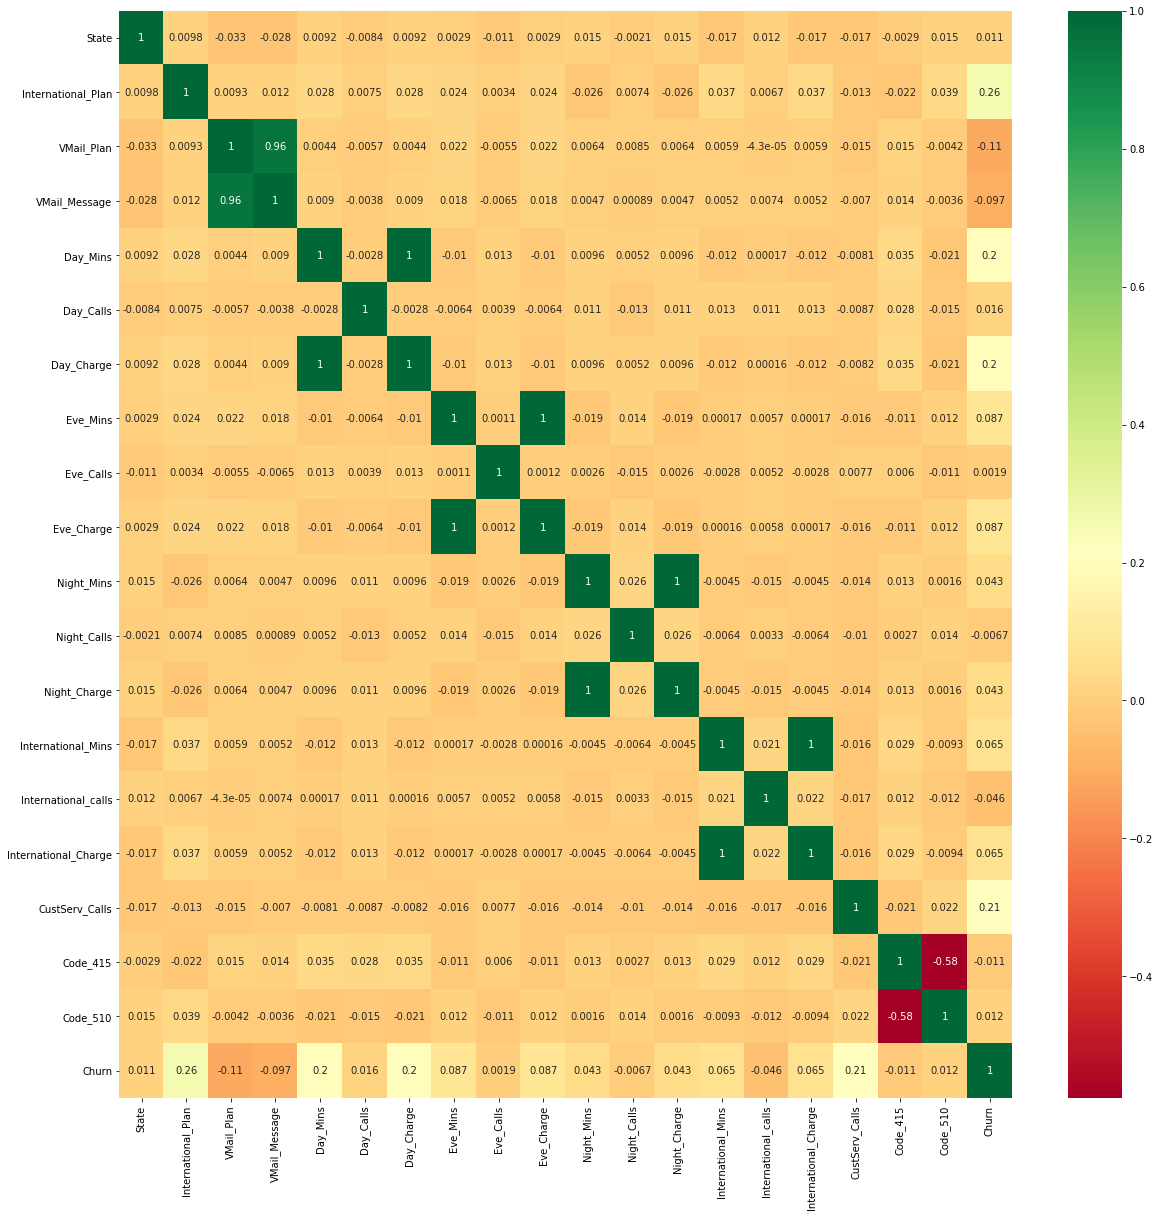

In [277]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# Selecting correlation above +0.15 and -0.15 so selecting all columns

In [278]:
data.drop(['State','VMail_Plan','VMail_Message','Day_Calls',
                'Eve_Mins','Eve_Calls','Eve_Charge','Night_Mins','Night_Calls','Night_Charge','International_Mins',
                'International_calls','International_Charge','Code_415','Code_510'],axis=1,inplace=True)

C:\Users\VARUN\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [279]:
data.head()

,International_Plan,Day_Mins,Day_Charge,CustServ_Calls,Churn
0,0,265.1,45.07,1,0
1,0,161.6,27.47,1,0
2,0,243.4,41.38,0,0
3,1,299.4,50.90,2,0
4,1,166.7,28.34,3,0


In [280]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   International_Plan  4617 non-null   int32  
 1   Day_Mins            4617 non-null   float64
 2   Day_Charge          4617 non-null   float64
 3   CustServ_Calls      4617 non-null   int64  
 4   Churn               4617 non-null   int32  
dtypes: float64(2), int32(2), int64(1)
memory usage: 144.4 KB


In [281]:
data

,International_Plan,Day_Mins,Day_Charge,CustServ_Calls,Churn
0,0,265.1,45.07,1,0
1,0,161.6,27.47,1,0
2,0,243.4,41.38,0,0
3,1,299.4,50.90,2,0
4,1,166.7,28.34,3,0
...,...,...,...,...,...
4612,0,144.0,24.48,3,0
4613,0,189.0,32.13,3,0
4614,0,127.5,21.68,1,0
4615,0,168.9,28.71,0,0


# 5) Algorithm
- Logistic Regression

In [282]:
X=data.iloc[:,:4]
y=data.iloc[:,-1]

In [283]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [284]:
model=LogisticRegression()

In [285]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [286]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3231, 4)
(3231,)
(1386, 4)
(1386,)


In [287]:
model.fit(X_train,y_train)

LogisticRegression()

In [288]:
y_predict=model.predict(X_test)

In [289]:
y_predict

array([0, 0, 0, ..., 0, 0, 1])

In [290]:
y_test

4454    0
2118    1
42      0
3879    0
2727    0
       ..
1853    0
3598    0
216     0
1235    0
1882    0
Name: Churn, Length: 1386, dtype: int32

In [291]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1200
           1       0.41      0.12      0.19       186

    accuracy                           0.86      1386
   macro avg       0.64      0.55      0.56      1386
weighted avg       0.81      0.86      0.82      1386



In [292]:
from sklearn.metrics import confusion_matrix

In [293]:
confusion_matrix(y_test,y_predict)

array([[1167,   33],
       [ 163,   23]], dtype=int64)

In [294]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(y_predict,y_test))

0.8585858585858586


# Hperparameter tuning

In [295]:
# Necessary imports 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV 
  
# Creating the hyperparameter grid 
c_space = np.logspace(-5, 8, 15) 
param_grid = {'C': c_space} 
  
# Instantiating logistic regression classifier 
logreg = LogisticRegression() 
  
# Instantiating the GridSearchCV object 
logreg_cv = GridSearchCV(logreg, param_grid, cv = 10) 
  
logreg_cv.fit(X, y) 
  
# Print the tuned parameters and score 
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))  
print("Best score is {}".format(logreg_cv.best_score_)) 

Tuned Logistic Regression Parameters: {'C': 0.05179474679231213}
Best score is 0.8596543369862241


In [296]:
pickle.dump(logreg_cv,open('model.pkl','wb'))

In [297]:
model=pickle.load(open('model.pkl','rb'))

In [298]:
print(model.predict([[0,250,43,1]]))

[0]
